# NLP Assignment 1 (40% of grade): Text classification for Fake News Detection

This coursework will involve you implementing functions for a text classifier, which you will train to detect **fake news** in a corpus of approx. 10,000 statements, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [141]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import io
import pandas as pd
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
def load_data(data_file_path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(data_file_path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

In [144]:
def parse_data_line(data_line):
    # Should return a tuple of the label as just FAKE or REAL and the statement
    # e.g. (label, statement)
    label = convert_label(data_line[1])
    text = data_line[2]
    return(label, text)

def convert_label(label):
    """Converts the multiple classes into two,
    making it a binary distinction between fake news and real."""
    #return label
    # Converting the multiclass labels to binary label
    label_value = {
        'true': 'REAL',
        'mostly-true': 'REAL',
        'half-true': 'REAL',
        'false': 'FAKE',
        'barely-true': 'FAKE',
        'pants-fire': 'FAKE'
    }
    return label_value[label]




In [145]:
import re
# import string
def pre_process(text):
  text = text.lower()
  tokens = nltk.tokenize.word_tokenize(text)
        # print('original :',text)
  text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text) # separates punctuation at ends of strings
  text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text) # separates punctuation at beginning of strings
    # # print("tokenising:", text) # uncomment for debugging
    #     tokens = re.split(r"\s+",text)
    # # normalisation - only by lower casing for now
    #     tokens = [t.lower() for t in tokens]
  return tokens

# Question 2: Basic Feature Extraction (20 marks)


In [146]:
global_feature_dict = {} # a global dictionary of features
def to_feature_vector(tokens):
 # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
    feature_dict ={}
    for token in tokens:
      if(token in feature_dict):
        feature_dict[token]+=1
      else:
        feature_dict[token]= 1 

    for token in tokens:
      if(token in global_feature_dict):
          global_feature_dict[token]+= 1
      else:
          global_feature_dict[token]= 1
      return feature_dict    


In [147]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [175]:
from nltk.metrics.scores import accuracy
#solution
from sklearn.metrics import classification_report
def cross_validate(dataset,folds):
    result = []
    fold_size = int(len(dataset)/folds) + 1
    
    for i in range(0,len(dataset),int(fold_size)):
        train1 = dataset[:i] + dataset[i + fold_size:]
        test1 = dataset[i:i+fold_size]
        classy = train_classifier(train1)
        df = pd.DataFrame(test1, columns= ['Statement', 'label'])
        A=df['Statement']  
        ar=0;af=0;br=0;bf=0;bf=0;cr=0;cf=0;a=0
        B=df['label']
        mypredict = predict_labels(A,classy)
        print(classification_report(B,mypredict, target_names=['Real', 'Fake']))
        p1,r1,f1,_=precision_recall_fscore_support(B,mypredict)
        # r1=precision_recall_fscore_support(B,mypredict)
        # f1=precision_recall_fscore_support(B,mypredict)
        AC = accuracy(B,mypredict)

        print(p1)
        ar += p1[0]
        af += p1[1]
        br += r1[0]
        bf += r1[1]
        cr += f1[0]
        cf += f1[1]
        a  += AC

    x = [ar/folds,af/folds]
    y = [br/folds,bf/folds]
    z = [cr/folds,cf/folds]
    a = [a/folds]
    result = [x,y,z,a]
    return result
       

In [169]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [150]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')
load_data(data_file_path)

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')



Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 10241 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 10241 rawData, 8192 trainData, 2049 testData
Training Samples: 
8192
Features: 
1328


In [151]:
raw_data

[('Says the Annies List political group supports third-trimester abortions on demand.',
  'FAKE'),
 ('When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
  'REAL'),
 ('Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
  'REAL'),
 ('Health care reform legislation is likely to mandate free sex change surgeries.',
  'FAKE'),
 ('The economic turnaround started at the end of my term.', 'REAL'),
 ('The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.',
  'REAL'),
 ('Jim Dunnam has not lived in the district he represents for years now.',
  'FAKE'),
 ("I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.",
  'REAL'),
 ('However, it took $19

In [28]:
len(train_data)


8192

In [152]:
train_data

[({'says': 1,
   'the': 1,
   'annies': 1,
   'list': 1,
   'political': 1,
   'group': 1,
   'supports': 1,
   'third-trimester': 1,
   'abortions': 1,
   'on': 1,
   'demand': 1,
   '.': 1},
  'FAKE'),
 ({'when': 2,
   'did': 1,
   'the': 1,
   'decline': 1,
   'of': 1,
   'coal': 1,
   'start': 1,
   '?': 1,
   'it': 1,
   'started': 2,
   'natural': 1,
   'gas': 1,
   'took': 1,
   'off': 1,
   'that': 1,
   'to': 1,
   'begin': 1,
   'in': 1,
   '(': 1,
   'president': 1,
   'george': 1,
   'w.': 1,
   ')': 1,
   'bushs': 1,
   'administration': 1,
   '.': 1},
  'REAL'),
 ({'hillary': 1,
   'clinton': 1,
   'agrees': 1,
   'with': 1,
   'john': 1,
   'mccain': 1,
   '``': 1,
   'by': 1,
   'voting': 1,
   'to': 1,
   'give': 1,
   'george': 1,
   'bush': 1,
   'the': 2,
   'benefit': 1,
   'of': 1,
   'doubt': 1,
   'on': 1,
   'iran': 1,
   '.': 1,
   "''": 1},
  'REAL'),
 ({'health': 1,
   'care': 1,
   'reform': 1,
   'legislation': 1,
   'is': 1,
   'likely': 1,
   'to': 1,
  

In [176]:
cv_result= []
cv_result = cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Training Classifier...
              precision    recall  f1-score   support

        Real       0.49      0.53      0.51       339
        Fake       0.65      0.61      0.63       481

    accuracy                           0.58       820
   macro avg       0.57      0.57      0.57       820
weighted avg       0.58      0.58      0.58       820

[0.48913043 0.64823009]
Training Classifier...
              precision    recall  f1-score   support

        Real       0.50      0.48      0.49       375
        Fake       0.58      0.60      0.59       445

    accuracy                           0.55       820
   macro avg       0.54      0.54      0.54       820
weighted avg       0.54      0.55      0.55       820

[0.50417827 0.5791757 ]
Training Classifier...
              precision    recall  f1-score   support

        Real       0.56      0.48      0.52       392
        Fake       0.58      0.65      0.61       428

    accuracy                           0.57       820
   macro av

# 4. Error Analysis (10 marks)

In [129]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    cm = metrics.confusion_matrix(y_test, preds)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

Training Classifier...


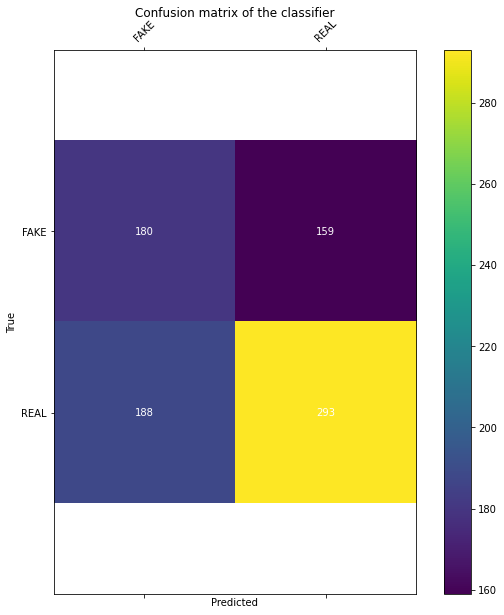

In [130]:
from sklearn.metrics import confusion_matrix
g = round(len(train_data)/10)
mytest = train_data[:g+1]
mytrain = train_data[g+1:]
#n_train = train_classifier(x_train)
testing_data = []
testing_prediction = []
for data in mytest:
  testing_data.append(data[0])
  testing_prediction.append(data[1])
class1= train_classifier(mytrain)  
myprediction = predict_labels(testing_data, class1)
labelling = ["FAKE", "REAL"]
confusion_matrix_heatmap(testing_prediction, myprediction,labelling)  

# Questions 5 (20%) and 6 (20%) (recommend starting a new notebook)

In [132]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'the': 2, 'bush': 1, 'tax': 1, 'cuts': 1, 'helped': 1, 'to': 1, 'create': 1, 'a': 1, 'substantial': 1, 'part': 1, 'of': 1, 'deficit': 1, '.': 1}, 'REAL')
Training Classifier...
Done training!
Precision: 0.564841
Recall: 0.565642
F Score:0.565188
